In [1]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

x=[[3],[1],[5],[2],[4]]
y=[[2.8],[0.9],[5],[2.1],[4.3]]
print(x)
print(y)

[[3], [1], [5], [2], [4]]
[[2.8], [0.9], [5], [2.1], [4.3]]


In [2]:
import numpy as np
import tensorflow as tf

#data process
x=np.asarray(x,dtype=np.float32)
print(x)
y=np.asarray(y,dtype=np.float32)
print(y)

C:\Users\saisai\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


[[3.]
 [1.]
 [5.]
 [2.]
 [4.]]
[[2.8]
 [0.9]
 [5. ]
 [2.1]
 [4.3]]


In [3]:
#data input
x_input=tf.placeholder(tf.float32,(None,1))
y_input=tf.placeholder(tf.float32,(None,1))

#model
w=tf.Variable(np.random.rand(1,1),dtype=tf.float32)
b=tf.Variable(np.random.rand(1,),dtype=tf.float32)

pred=tf.add(tf.matmul(x_input,w),b)

#define loss
loss=tf.reduce_mean(tf.pow(pred-y_input,2))

#define optimization
optim=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#define session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())

    #start train model
    for epoch in range(training_epochs):
        pred_y,l,_=sess.run([pred,loss,optim],feed_dict={x_input:x,y_input:y})
        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            print("Epoch {:4d} cost: {:.9f}".format((epoch + 1),l))
    print("Optimization Finished!")
    final_w=np.squeeze(sess.run(w))
    final_b=np.squeeze(sess.run(b))
    print("Training modal w: {:.5f}, b: {:.5f}".format(final_w,final_b))

Epoch   50 cost: 0.185376257
Epoch  100 cost: 0.139705285
Epoch  150 cost: 0.107154824
Epoch  200 cost: 0.083955407
Epoch  250 cost: 0.067420810
Epoch  300 cost: 0.055636279
Epoch  350 cost: 0.047237217
Epoch  400 cost: 0.041251071
Epoch  450 cost: 0.036984622
Epoch  500 cost: 0.033943839
Epoch  550 cost: 0.031776659
Epoch  600 cost: 0.030232083
Epoch  650 cost: 0.029131189
Epoch  700 cost: 0.028346557
Epoch  750 cost: 0.027787367
Epoch  800 cost: 0.027388815
Epoch  850 cost: 0.027104760
Epoch  900 cost: 0.026902298
Epoch  950 cost: 0.026757991
Epoch 1000 cost: 0.026655173
Optimization Finished!
Training modal w: 1.02966, b: -0.06269


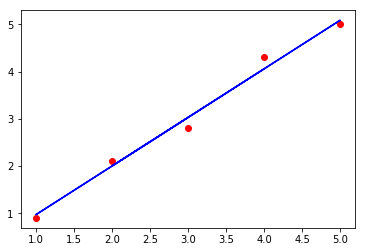

In [5]:
#show your result
pred_y=final_w*x+final_b
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'ro',x,pred_y,'b')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

Sigmoid Function Input :: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
Sigmoid Function Output :: [0.50001135 0.50003085 0.50008384 0.50022776 0.50061816 0.50167321
 0.50449643 0.51185425 0.52976549 0.56683301 0.62245933 0.67503753
 0.70698737 0.72163256 0.72750761 0.72974065 0.73057215 0.73087942
 0.73099264 0.73103432]


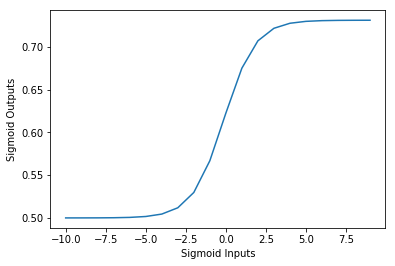

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

sigmoid_inputs = np.arange(-10,10)
sigmoid_outputs=sigmoid(sigmoid(sigmoid_inputs))
print("Sigmoid Function Input :: {}".format(sigmoid_inputs))
print("Sigmoid Function Output :: {}".format(sigmoid_outputs))

plt.plot(sigmoid_inputs,sigmoid_outputs)
plt.xlabel("Sigmoid Inputs")
plt.ylabel("Sigmoid Outputs")
plt.show()

Sigmoid Function Input :: [-19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2
  -1   0]
Sigmoid Function Output :: [3.54164282e-09 9.62718333e-09 2.61693975e-08 7.11357977e-08
 1.93367146e-07 5.25626400e-07 1.42880069e-06 3.88388295e-06
 1.05574885e-05 2.86982290e-05 7.80098745e-05 2.12052824e-04
 5.76419339e-04 1.56687021e-03 4.25919483e-03 1.15776919e-02
 3.14714295e-02 8.55482150e-02 2.32544158e-01 6.32120560e-01]


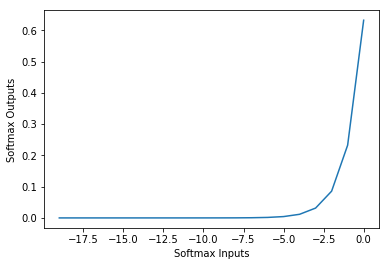

In [8]:
def softmax(x):
    orig_shape=x.shape
    if len(x.shape)>1:
        #Matrix
        #shift max whithin each row
        constant_shift=np.max(x,axis=1).reshape(1,-1)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x,axis=1).reshape(1,-1)
        x/=normlize
    else:
        #vector
        constant_shift=np.max(x)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x)
        x/=normlize
    assert x.shape==orig_shape
    return x

softmax_inputs = np.arange(-10,10)
softmax_outputs=softmax(softmax_inputs)
print("Sigmoid Function Input :: {}".format(softmax_inputs))
print("Sigmoid Function Output :: {}".format(softmax_outputs))
# 画图像
plt.plot(softmax_inputs,softmax_outputs)
plt.xlabel("Softmax Inputs")
plt.ylabel("Softmax Outputs")
plt.show()